<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/kmeans_and_hierarchical_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

**1. What is k-means clustering?**

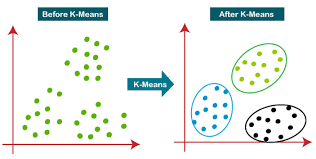

**2. How it works**

* Initialize K random centroids.
You could pick K random data points and make those your starting points.
Otherwise, you pick K random values for each variable.
* For every data point, look at which centroid is nearest to it.
Using some sort of measurement like Euclidean or Cosine distance.
* Assign the data point to the nearest centroid.
* For every centroid, move the centroid to the average of the points assigned to that centroid.
* Repeat the last three steps until the centroid assignment no longer changes.


The algorithm is said to have “converged” once there are no more changes.




# Hierarchical clustering

**1. What is hierarchical clustering?**
![link text](https://miro.medium.com/v2/resize:fit:1039/0*afzanWwrDq9vd2g-)

**2. How it works**

*Agglomerative Hierarchical Clustering (Bottom-Up Approach):*

In agglomerative hierarchical clustering, each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

    Step-by-step outline of an agglomerative clustering algorithm:
        
  * Start by assigning each data point to its own cluster, so if you have N data points, you have N clusters.
  * Find the closest (most similar) pair of clusters and merge them into a single cluster. The distance between clusters could be computed in various ways. Some common approaches include single linkage (minimum distance between clusters), complete linkage (maximum distance), average linkage (average distance), and Ward's method (minimizes the variance of the clusters being merged).
  * Update the distance matrix that measures the distances between the clusters.
  * Repeat steps 2 and 3 until all the data points are in one cluster.

The output of this clustering is a tree-based representation of the data called a dendrogram, which shows the order in which clusters were merged.

*Divisive Hierarchical Clustering (Top-Down Approach):*

Divisive hierarchical clustering works in the opposite way. Instead of starting with N clusters (in case of N observations), we start with one cluster and assign all of the observations to that one cluster.

    Step-by-step outline of a divisive clustering algorithm:
 * Start with one cluster that includes all data points.
 * Find the cluster to split and the way to split it so that it maximizes the distance (or difference) between the resulting clusters.
 * Repeat step 2 until each data point is in its own cluster.

    As with agglomerative clustering, the result of divisive clustering can be visualized using a dendrogram.

# Let's get our hands dirty!

Data: http://bit.ly/IPAdvertisingData

**Objective:**

The objective of this project is to perform clustering on different visitors to a website to identify which type of visitors are generating revenue and which visitors are not generating revenue.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('http://bit.ly/IPAdvertisingData')

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [ ]:
df['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [ ]:
df['City'].value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

In [ ]:
df['Ad Topic Line'].value_counts()

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [ ]:
df.drop(columns=['Ad Topic Line', 'City', 'Country'], inplace = True)

In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
df.drop(columns=['Timestamp'], inplace = True)

In [ ]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

In [ ]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

In [ ]:
df['Male'] = df['Male'].astype('category')

In [ ]:
df['Clicked on Ad'] = df['Clicked on Ad'].astype('category')

In [ ]:
df.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0
unique,NaN,NaN,NaN,NaN,2.0,2.0
top,NaN,NaN,NaN,NaN,0.0,0.0
freq,NaN,NaN,NaN,NaN,519.0,500.0
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN


In [ ]:
?df.describe

In [ ]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658
Age,-0.331513,1.000000,-0.182605,-0.367209
Area Income,0.310954,-0.182605,1.000000,0.337496
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000


In [ ]:
df.info()

NameError: ignored

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(init='random', n_clusters = 2)

In [ ]:
?KMeans